In [1]:
import pandas as pd
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt

import cleantools as clnt
import logistic as lg

# Initial Example #

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.646765
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.044     
Dependent Variable:       From Venezia           AIC:                    48443.8916
Date:                     2020-06-25 13:02       BIC:                    48614.4908
No. Observations:         37420                  Log-Likelihood:         -24202.   
Df Model:                 19                     LL-Null:                -25316.   
Df Residuals:             37400                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
------------------------------------

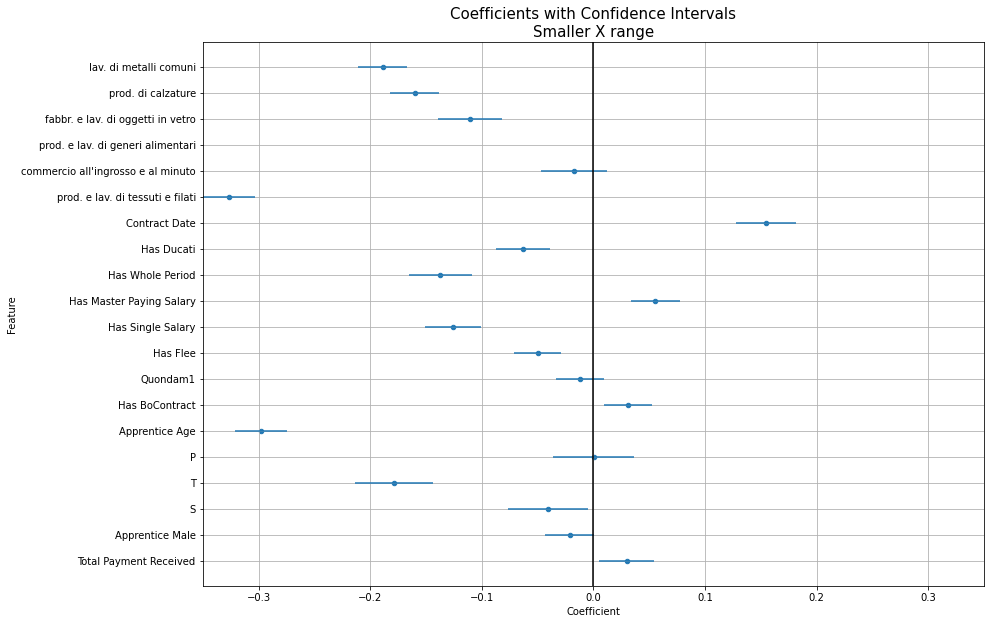

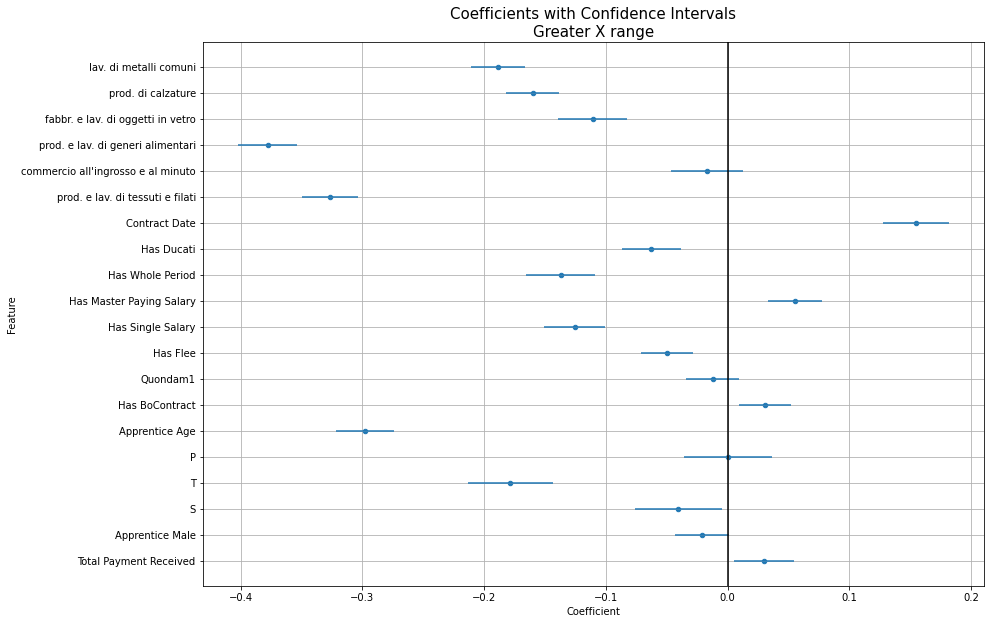

In [2]:
# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
df = lg.dummyLabels(df)

# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From Venezia",
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni"
]
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From Venezia", outlier_list=[])

# Get a detailed report from statsmodels
reg.getReport()

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      5517
         1.0       0.62      0.44      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.63      0.63      9355
weighted avg       0.65      0.66      0.65      9355



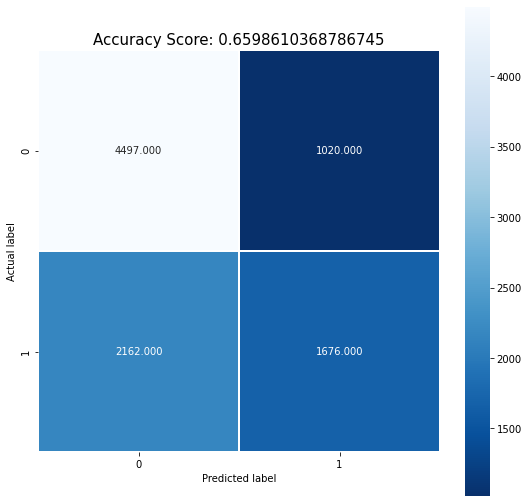

In [11]:
reg.applyLogistic()

Oversample Size 33186
Number of 1s in target 16593.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.646765
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.044     
Dependent Variable:       From Venezia           AIC:                    48443.8916
Date:                     2020-06-24 16:39       BIC:                    48614.4908
No. Observations:         37420                  Log-Likelihood:         -24202.   
Df Model:                 19                     LL-Null:                -25316.   
Df Residuals:             37400                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                       

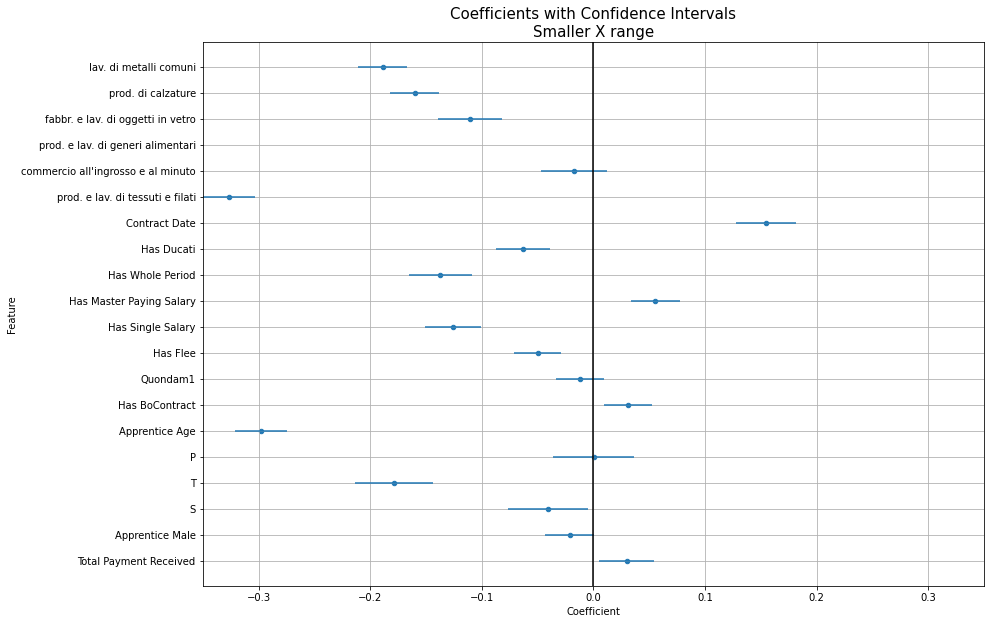

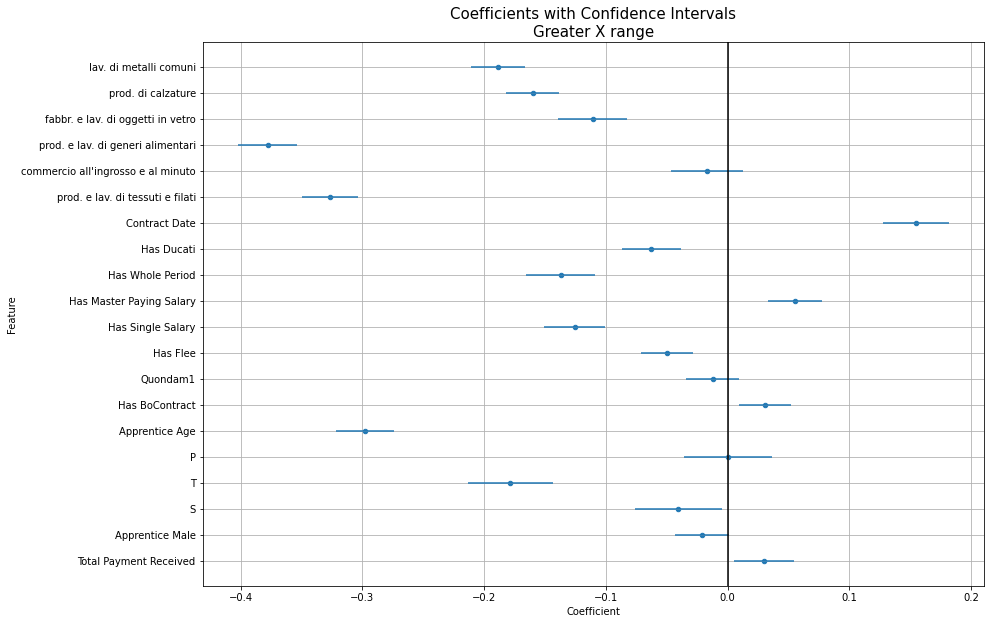

In [12]:
reg.overSample()
reg.getReport()

['T', 'Apprentice Age', 'Has Single Salary', 'Has Whole Period', 'Contract Date', 'prod. e lav. di tessuti e filati', 'prod. e lav. di generi alimentari', 'fabbr. e lav. di oggetti in vetro', 'prod. di calzature', 'lav. di metalli comuni']
Before outlier clean 37420
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      5517
         1.0       0.62      0.43      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.62      0.62      9355
weighted avg       0.65      0.66      0.64      9355



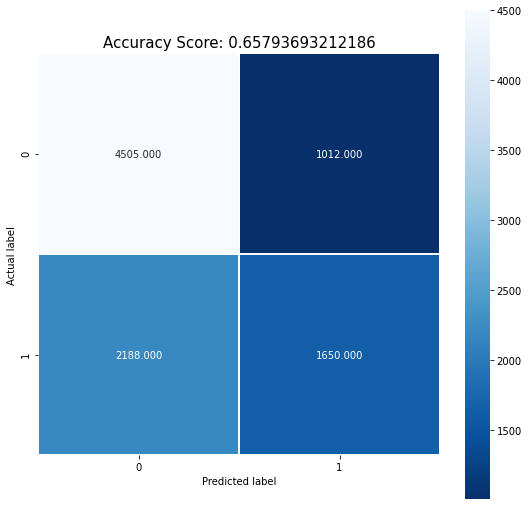

Optimization terminated successfully.
         Current function value: 0.648162
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.042     
Dependent Variable:        From Venezia          AIC:                   48528.4086
Date:                      2020-06-24 16:39      BIC:                   48613.7082
No. Observations:          37420                 Log-Likelihood:        -24254.   
Df Model:                  9                     LL-Null:               -25316.   
Df Residuals:              37410                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------

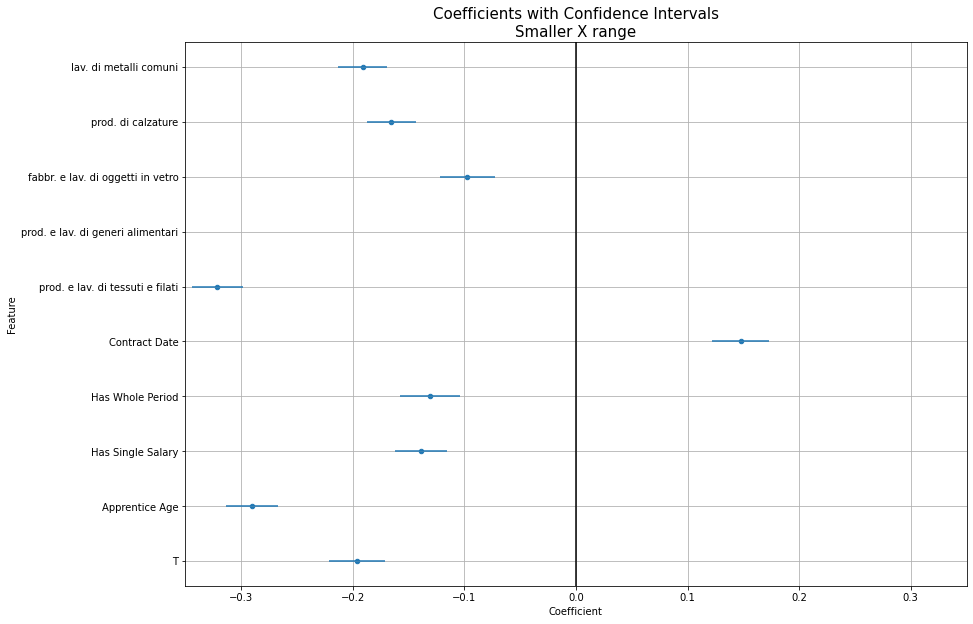

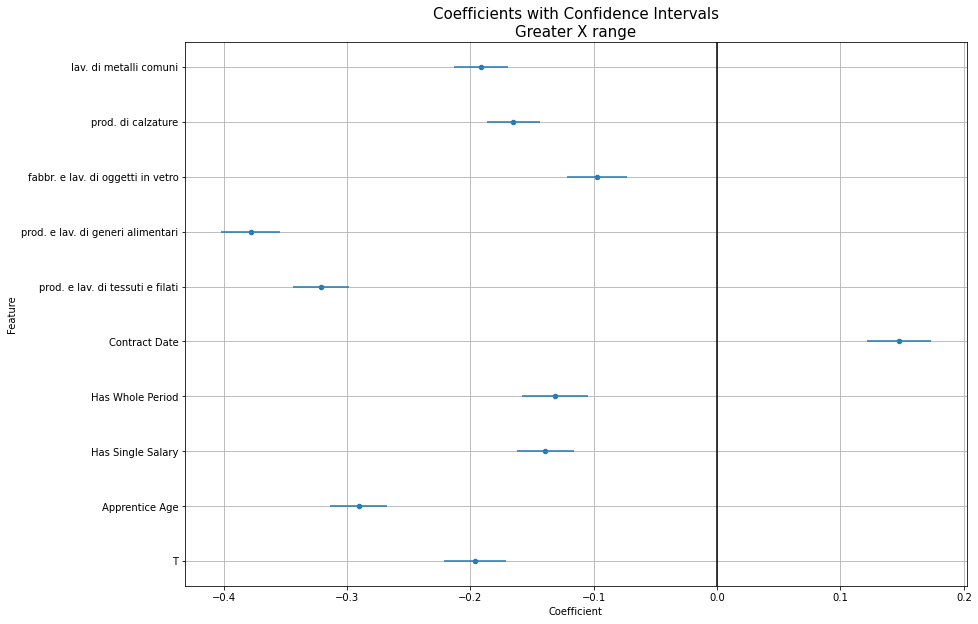

In [13]:
reg.selectFeatures()
reg.getReport()

# Adding Category as Feature #

In [14]:
# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
categories = clnt.loadPickle("../data/pickles/generated_categories_appRel_femCon_fromVen.pkl")

# Get dummy Labels for professions, and eliminate From Venezia from Category
df = dummyLabels(df, other=True)
categories["Category"] = categories["Category"] - categories["From Venezia"] * 4
category_dummies = categories["Category"].astype(str).str.get_dummies()
category_dummies.columns = [f"Cat {a}." for a in range(len(category_dummies.keys()))]
df = df.join(category_dummies)

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.642747
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.050     
Dependent Variable:       From Venezia           AIC:                    48147.1549
Date:                     2020-06-24 16:39       BIC:                    48334.8140
No. Observations:         37420                  Log-Likelihood:         -24052.   
Df Model:                 21                     LL-Null:                -25316.   
Df Residuals:             37398                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
------------------------------------

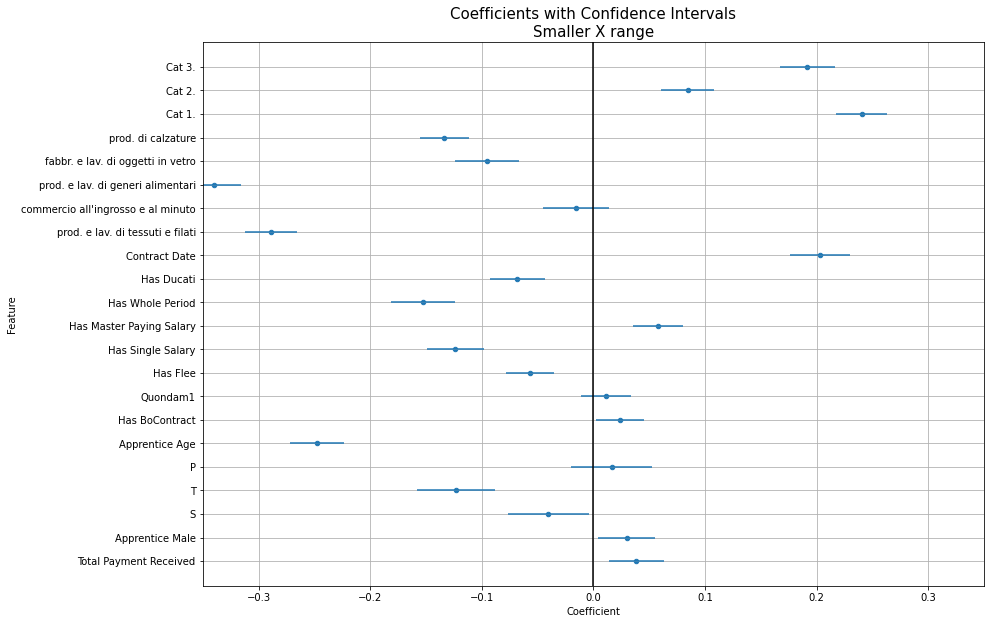

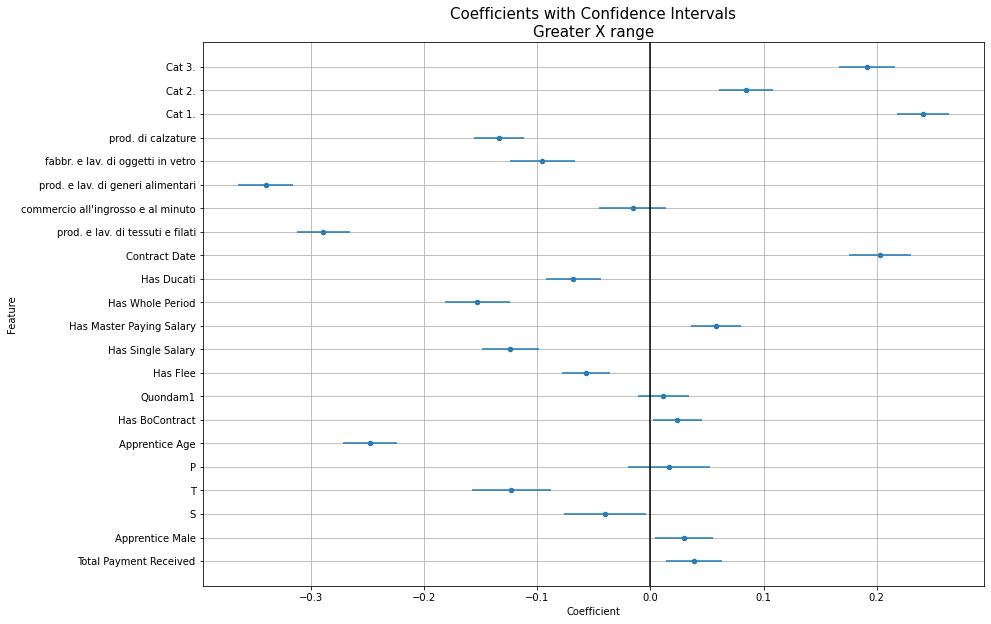

In [15]:
# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From Venezia",
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
#     "lav. di metalli comuni",
#     "Other Label",
#     "Cat 0.",
    "Cat 1.",
    "Cat 2.",
    "Cat 3."
]

# Logistic Regression
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From Venezia", outlier_list=[])
reg.getReport()

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      5517
         1.0       0.62      0.44      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.63      0.63      9355
weighted avg       0.65      0.66      0.65      9355



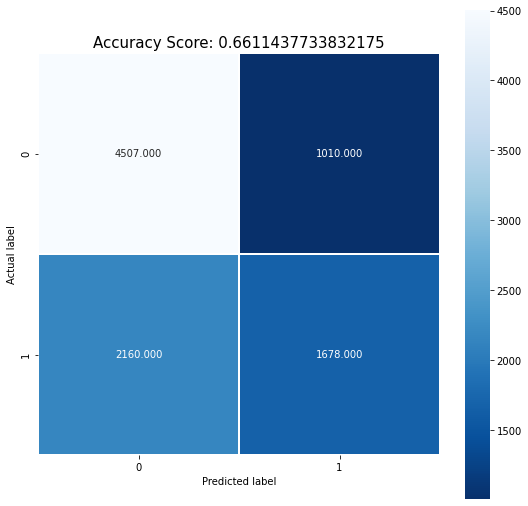

In [16]:
reg.applyLogistic()

Oversample Size 33186
Number of 1s in target 16593.0
Number of 0s in target 16593.0
Optimization terminated successfully.
         Current function value: 0.642747
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.050     
Dependent Variable:       From Venezia           AIC:                    48147.1549
Date:                     2020-06-24 16:39       BIC:                    48334.8140
No. Observations:         37420                  Log-Likelihood:         -24052.   
Df Model:                 21                     LL-Null:                -25316.   
Df Residuals:             37398                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                       

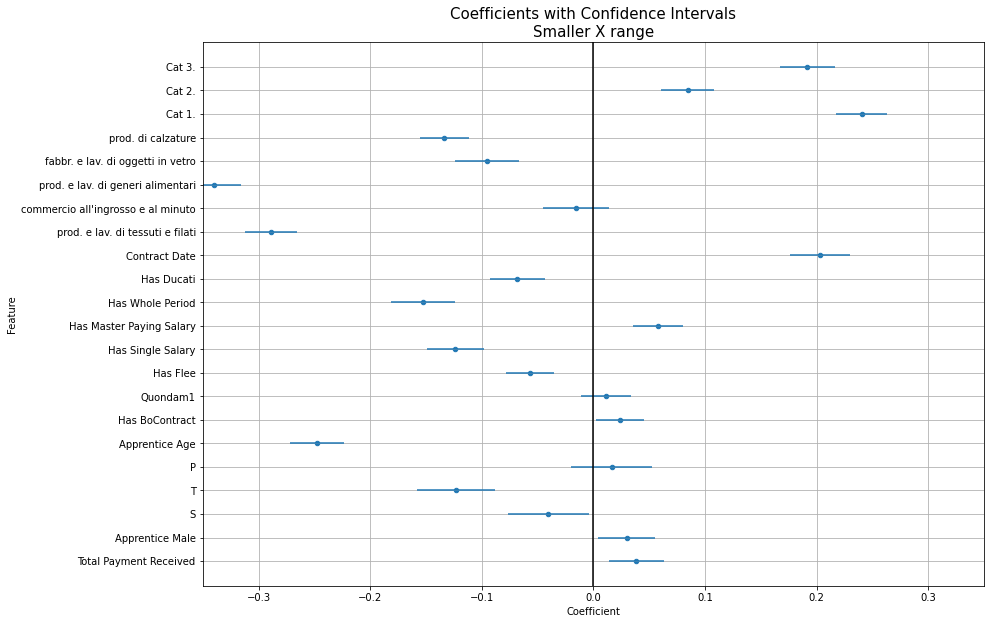

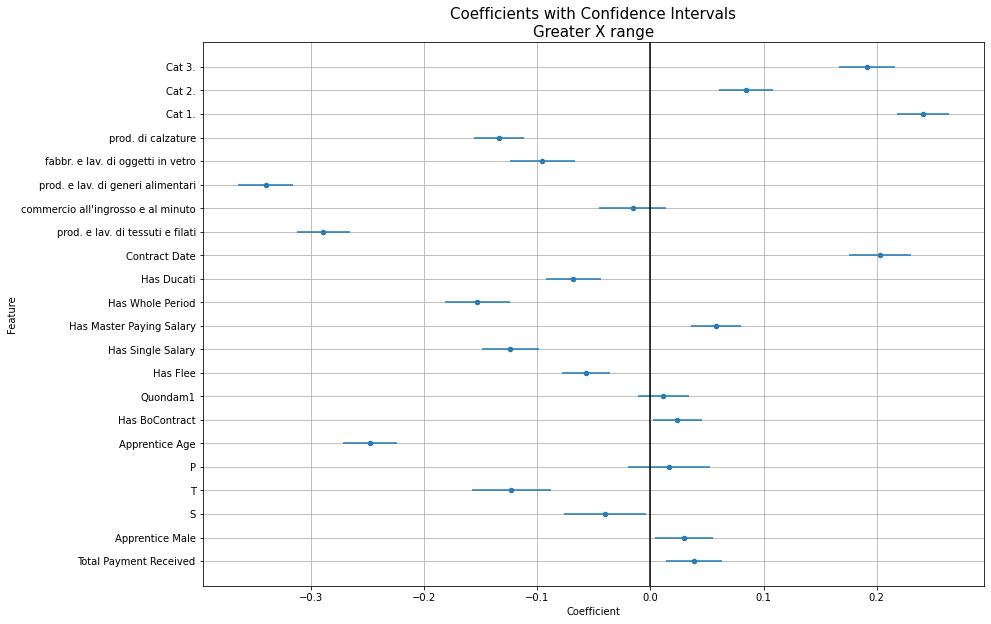

In [17]:
reg.overSample()
reg.getReport()

['T', 'Apprentice Age', 'Has Single Salary', 'Has Whole Period', 'Contract Date', 'prod. e lav. di tessuti e filati', 'prod. e lav. di generi alimentari', 'fabbr. e lav. di oggetti in vetro', 'prod. di calzature', 'Cat 1.', 'Cat 3.']
Before outlier clean 37420
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      5517
         1.0       0.63      0.43      0.51      3838

    accuracy                           0.66      9355
   macro avg       0.65      0.62      0.62      9355
weighted avg       0.65      0.66      0.64      9355



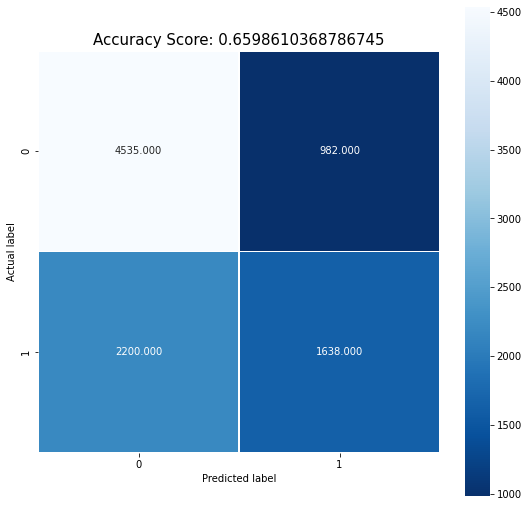

Optimization terminated successfully.
         Current function value: 0.645055
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.047     
Dependent Variable:        From Venezia          AIC:                   48297.8984
Date:                      2020-06-24 16:39      BIC:                   48391.7279
No. Observations:          37420                 Log-Likelihood:        -24138.   
Df Model:                  10                    LL-Null:               -25316.   
Df Residuals:              37409                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------

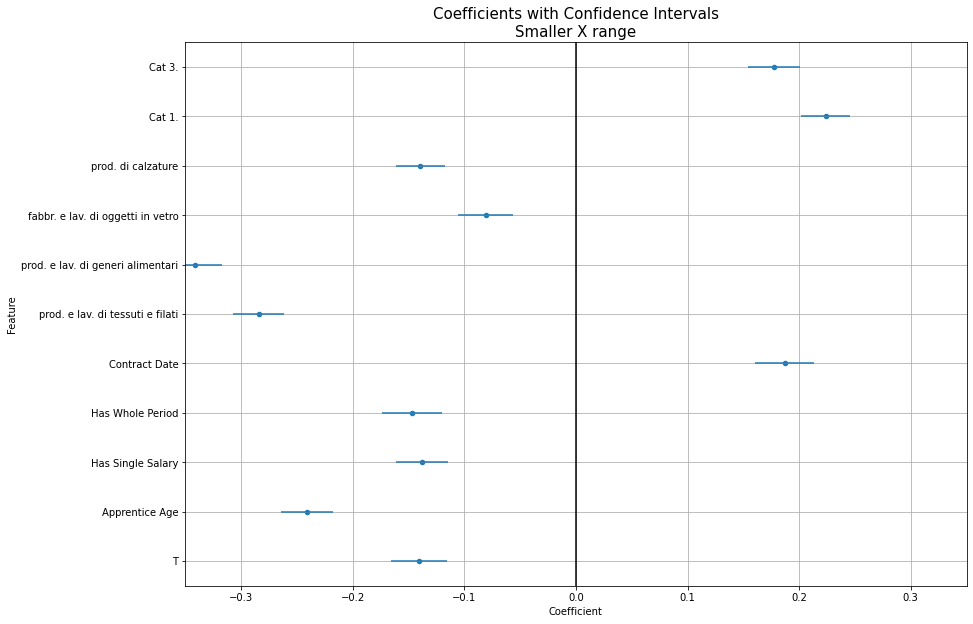

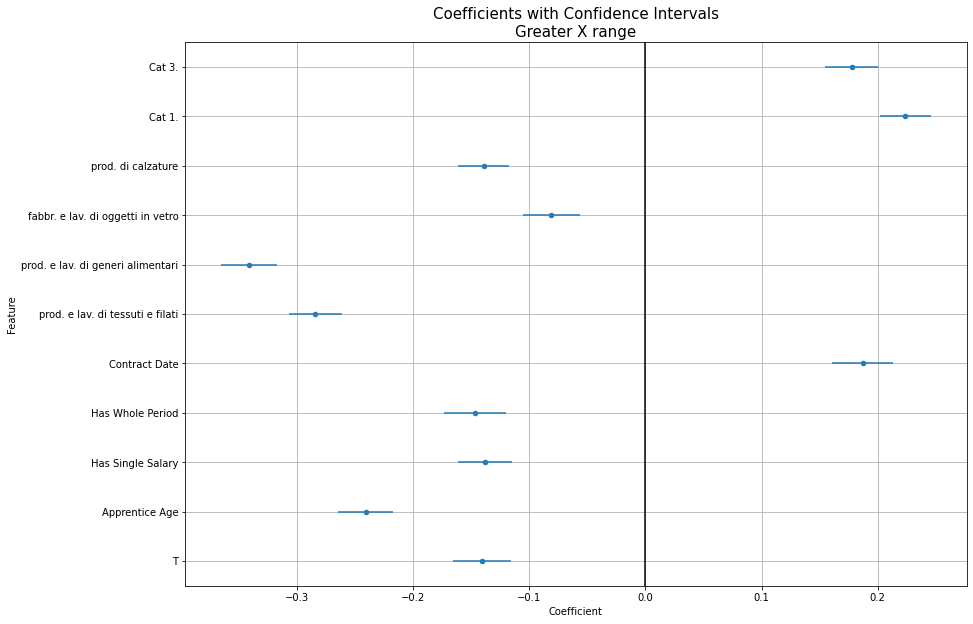

In [19]:
reg.selectFeatures()
reg.getReport()

# Introducing Base-Line Dependencies #

In the previous examples, we saw that including category 0 or having an other profession label was problematic for the convergence of our algorithm. Therefore, here we will tweak our variables a bit more, and use the formulas in statsmodels library to make category 0 and other label the baselines for their respective categorical data columns.

In [21]:
# Load the table
df = clnt.loadPickle("../data/pickles/table_of_all.pkl")
categories = clnt.loadPickle("../data/pickles/generated_categories_appRel_femCon_fromVen.pkl")
categories["Category"] = (categories["Category"] - categories["From Venezia"] * 4).astype(str)
categories = categories[["Category"]]

# Create regression object
columns_needed = [
    'Total Payment Received', 'Apprentice Male', 'S', 'T',
    'P','Apprentice Age', 'Has BoContract', 'Quondam1',
    'Has Flee', 'Has Single Salary', 'Has Master Paying Salary',
    'Has Whole Period', 'Has Ducati', 'Contract Date', "From_Venezia"
]

# Labels to base against other
label_columns = [
    "prod. e lav. di tessuti e filati",
    "commercio all'ingrosso e al minuto",
    "prod. e lav. di generi alimentari",
    "fabbr. e lav. di oggetti in vetro",
    "prod. di calzature",
    "lav. di metalli comuni"
]


    
# Keep parent label in store, fix label From_Venezia
pocket_label = df["Parent Label"].apply(lambda x:lg.labelConvert(x, label_columns)).copy()
df["From_Venezia"] = df["From Venezia"].copy()
del df["From Venezia"]

# Create and load regression
reg = lg.myRegressor(column_list=columns_needed)
reg.loadData(df, "From_Venezia", outlier_list=[])

# Rename and relabel
reg.x_data = reg.x_data.join(pocket_label)
reg.column_list.append("Parent Label")
reg.x_data = reg.x_data.join(categories)
reg.column_list.append("Category")
reg.x_data.columns = [a.replace("'", "_").replace(".", "").replace(" ", "_") for a in reg.x_data.columns]

Before drop na columns 54216
Before outlier clean 37420
Total Size 37420
Training Size 28065
Number of 1s in target 11472.0
Number of 0s in target 16593.0


Optimization terminated successfully.
         Current function value: 0.620876
         Iterations 5
                                                         Results: Logit
Model:                                   Logit                                 Pseudo R-squared:                      0.082     
Dependent Variable:                      From_Venezia                          AIC:                                   46514.3271
Date:                                    2020-06-26 10:08                      BIC:                                   46719.0462
No. Observations:                        37420                                 Log-Likelihood:                        -23233.   
Df Model:                                23                                    LL-Null:                               -25316.   
Df Residuals:                            37396                                 LLR p-value:                           0.0000    
Converged:                               1.0000     

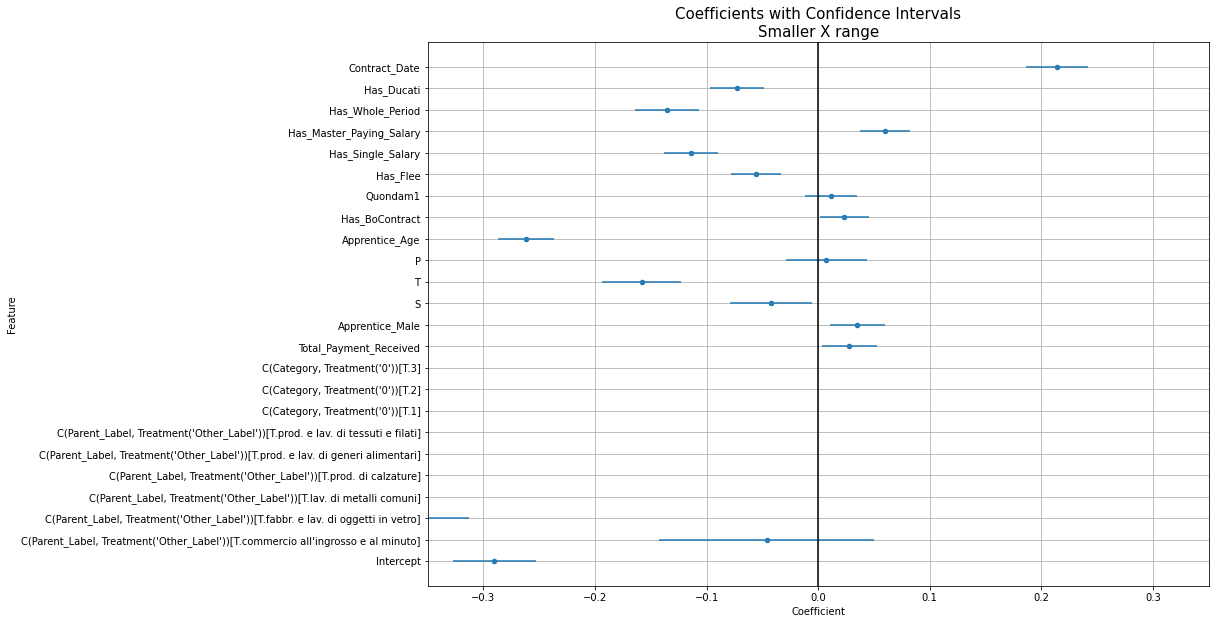

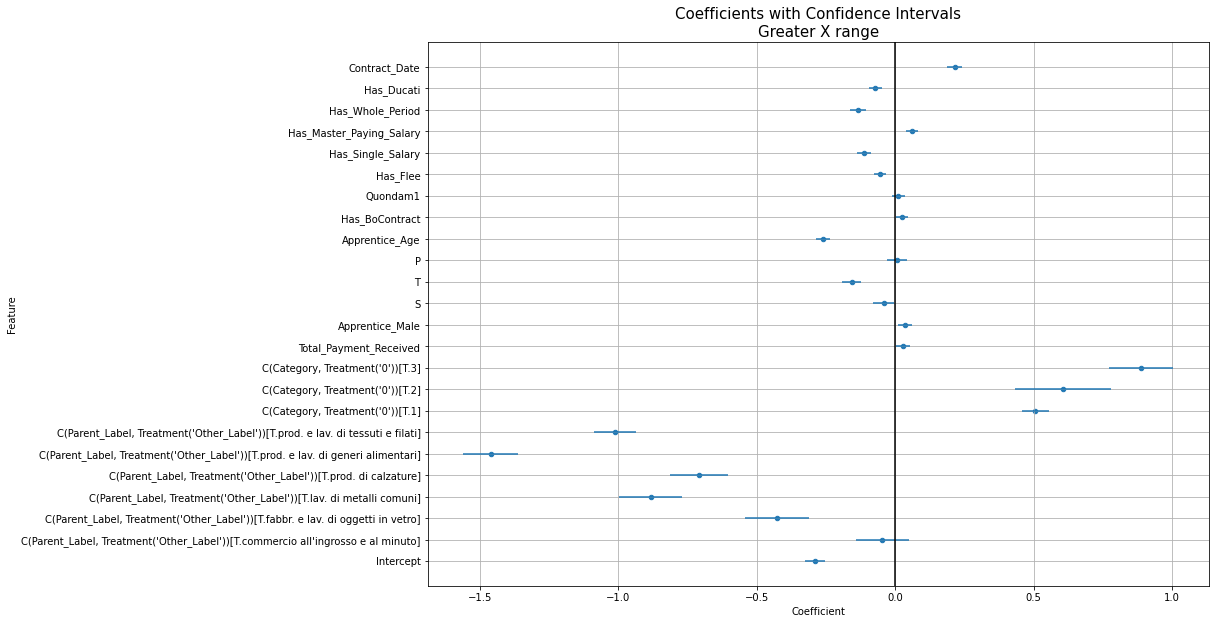

In [22]:
# We create a formula to plug in
formula = ("From_Venezia ~ " +
           " + ".join(reg.x_data.columns[:-2]) +
           " + C(Parent_Label, Treatment('Other_Label'))" +
           " + C(Category, Treatment('0'))")

# We put the formula, and get results
reg.formula = formula
reg.getReport()